In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
plt.style.use('ggplot')



In [2]:
def set_ax_style(ax):
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)

    #for line in ax.get_ygridlines()+ax.get_xgridlines():
    #    line.set_linestyle('-.')
    #    line.set_color("black")
    #    line.set_linewidth(1.0)

    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_linewidth(1.0)


    ticklabels = ax.get_xticklabels() + ax.get_yticklabels()   
    for label in ticklabels:
        label.set_fontsize(15)

Quantidade de nos  48


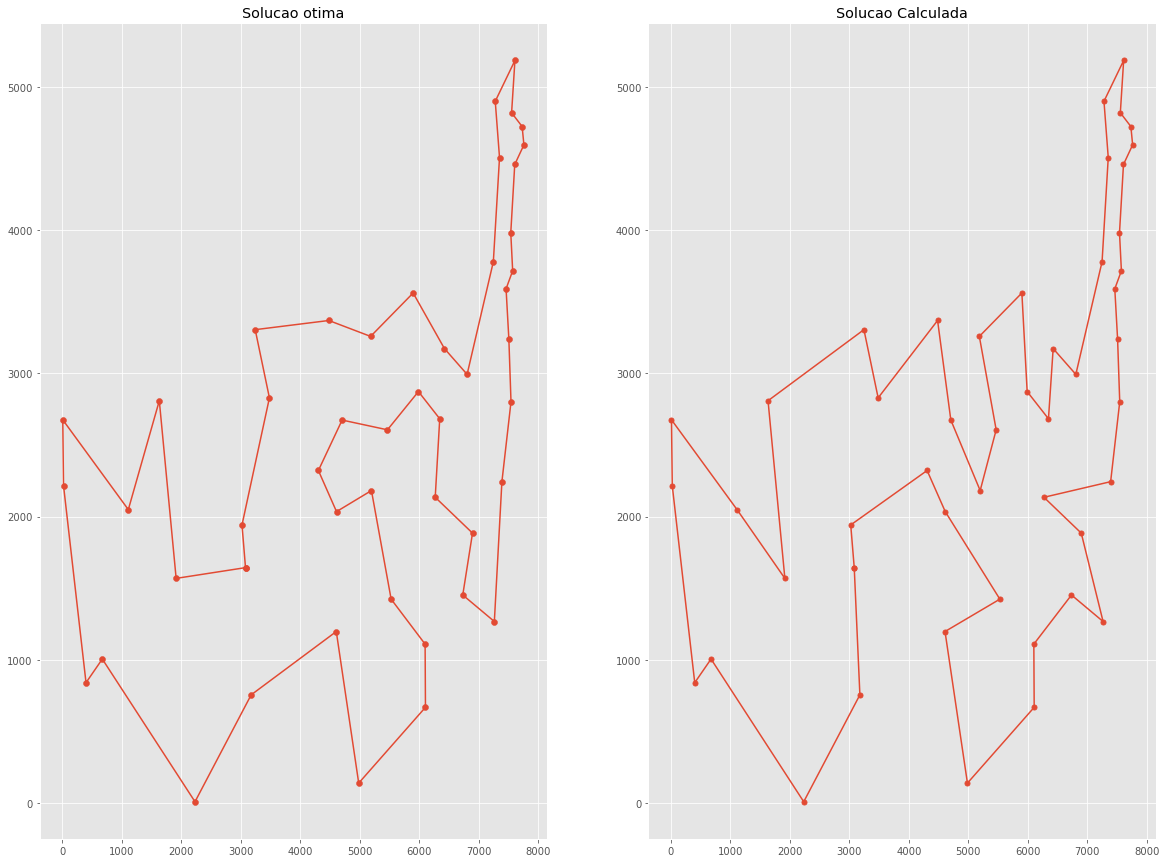

In [3]:
def plot_sol(ax):

    f = open("../ALL_tsp/att48.tsp")

    ler_nos = False

    xs = []
    ys = []
    for line in f:
        if "NODE_COORD_SECTION" in line:
            ler_nos = True
            continue

        if "EOF" in line:
            break

        if ler_nos:
            id, x, y = line.split();
            x = float(x)
            y = float(y)
            xs.append(x)
            ys.append(y)

    f.close()

    n = len(xs)
    print "Quantidade de nos ", n

    f = open("../ALL_tsp/att48.opt.tour")

    sol = []

    ler_nos = False

    for line in f:
        if "TOUR_SECTION" in line:
            ler_nos = True
            continue

        if "EOF" in line:
            break

        if ler_nos:
            if int(line) > 0:
                sol.append(int(line)-1)


    cost_sol = 0.0
    cost_init = 0.0
    xsol = []
    ysol = []
    for i in range(n):
        i1 = sol[i]
        i2 = sol[(i+1)%n]
        x1 = xs[i1]
        y1 = ys[i1]

        x2 = xs[i2]
        y2 = ys[i2]

        cost_sol += math.sqrt((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1))

        xsol.append(xs[i1])
        ysol.append(ys[i1])

        x1 = xs[i]
        y1 = ys[i]

        x2 = xs[(i+1)%n]
        y2 = ys[(i+1)%n]
        cost_init += math.sqrt((x2-x1)*(x2-x1) + (y2-y1)*(y2-y1))

    xsol.append(xsol[0])
    ysol.append(ysol[0])

    f.close()

    ax.plot(xsol, ysol)

fig, axis = plt.subplots(1,2, figsize=(20,15))

f = open("path.txt")
xs = []
ys = []


for line in f:
    id, x, y = line.split()
    xs.append(float(x))
    ys.append(float(y))

xs.append(xs[0])
ys.append(ys[0])

axis[0].scatter(xs, ys)
f.close()

axis[1].plot(xs, ys, marker="o", ms=5)
plot_sol(axis[0])

axis[0].set_title("Solucao otima")
axis[1].set_title("Solucao Calculada")

plt.show("resultado.png")

# Resultados para um nó

In [4]:
names = ["Caso", "Tipo", "Processos/Threads" ,"Tempo Total", "Tempo Encontrar Minimo", "Tempo Sincronizar", "Iteracoes", "Custo Calc", "Custo Otimo"]
data = pd.read_csv("resultados_random_1_corrigido.txt", sep=";", header=None, names=names)
data["Tempo Swap"] = data["Tempo Total"] - data["Tempo Encontrar Minimo"] - data["Tempo Sincronizar"]
names.append("Tempo Swap")


In [5]:
data.Caso = data.Caso.apply(lambda x: x.split("/")[-1].split(".")[0])
data.Tipo = data.Tipo.apply(lambda x: x.strip())
casos = data.Caso.unique()

In [6]:
data[(data.Caso=="att48") & (data["Processos/Threads"]==16) & (data.Tipo=="OpenMP")]

,Caso,Tipo,Processos/Threads,Tempo Total,Tempo Encontrar Minimo,Tempo Sincronizar,Iteracoes,Custo Calc,Custo Otimo,Tempo Swap
9,att48,OpenMP,16,2.589844,0.553467,1.917236,45,35192.441606,33523.708507,0.119141
19,att48,OpenMP,16,117.784912,0.328613,117.339600,43,34595.186088,33523.708507,0.116699
29,att48,OpenMP,16,164.322998,0.354736,163.873779,48,34214.420334,33523.708507,0.094483
39,att48,OpenMP,16,29.447998,0.524658,28.807861,43,34529.439744,33523.708507,0.115479
49,att48,OpenMP,16,23.891846,0.505127,23.269043,43,34056.217750,33523.708507,0.117676
59,att48,OpenMP,16,6.281006,0.555664,5.602295,47,35102.997281,33523.708507,0.123047
69,att48,OpenMP,16,5.274170,0.500488,4.666504,42,34329.891873,33523.708507,0.107178
79,att48,OpenMP,16,18.520020,0.574463,17.823975,47,34637.923968,33523.708507,0.121582
89,att48,OpenMP,16,1.190918,0.507812,0.575928,41,34892.628753,33523.708507,0.107178
99,att48,OpenMP,16,24.972900,0.621338,24.224854,50,36943.608739,33523.708507,0.126708


In [7]:
mean_data = data.groupby(names[0:3], as_index=False).mean()
mean_data[:5]


,Caso,Tipo,Processos/Threads,Tempo Total,Tempo Encontrar Minimo,Tempo Sincronizar,Iteracoes,Custo Calc,Custo Otimo,Tempo Swap
0,att48,MPI,1,3.974389,3.831763,0.048877,43.1,35227.109155,33523.708507,0.093750
1,att48,MPI,2,2.593335,2.020654,0.470337,43.7,35126.641971,33523.708507,0.102344
2,att48,MPI,4,1.925659,1.037524,0.785425,43.7,35126.641971,33523.708507,0.102710
3,att48,MPI,8,1.986304,0.595117,1.277759,45.9,35033.479752,33523.708507,0.113428
4,att48,MPI,16,1.755444,0.329077,1.319165,43.7,34879.612174,33523.708507,0.107202


In [8]:
std_data = data.groupby(names[0:3], as_index=True).std()
std_data[:10]

Tempo Total  Tempo Encontrar Minimo  \
Caso  Tipo   Processos/Threads                                        
att48 MPI    1                     0.166584                0.161222   
             2                     0.199715                0.201294   
             4                     0.097390                0.062101   
             8                     0.104220                0.034542   
             16                    0.181143                0.022735   
      OpenMP 1                     0.371706                0.367525   
             2                     0.199514                0.178051   
             4                     0.092379                0.080291   
             8                     0.085602                0.066165   
             16                   55.587732                0.092692   

                                Tempo Sincronizar  Iteracoes  Custo Calc  \
Caso  Tipo   Processos/Threads                                             
att48 MPI    1                           0.002403   1.852926  914.482260   
             2                           0.029270   2.584140  915.797857   
             4                           0.035651   2.584140  915.797857   
             8                           0.069499   2.643651  583.833894   
             16                          0.173129   2.983287  312.746444   
      OpenMP 1                           0.003154   3.842742  928.246857   
             2                           0.020626   3.348300  839.960488   
             4                           0.023882   3.348300  839.960488   
             8                           0.022206   3.627059  703.836169   
             16                         55.671658   2.960856  822.159445   

                                Custo Otimo  Tempo Swap  
Caso  Tipo   Processos/Threads                           
att48 MPI    1                          0.0    0.005334  
             2                          0.0    0.009966  
             4                          0.0    0.007562  
             8                          0.0    0.008294  
             16                         0.0    0.006794  
      OpenMP 1                          0.0    0.006507  
             2                          0.0    0.007879  
             4                          0.0    0.007709  
             8                          0.0    0.013748  
             16                         0.0    0.009521

In [9]:
for name in names[3:]:
    key = "%s (std)" % name
    mean_data[key.strip()] = np.array(std_data[name])

mean_data[mean_data.Caso=="att48"]

,Caso,Tipo,Processos/Threads,Tempo Total,Tempo Encontrar Minimo,Tempo Sincronizar,Iteracoes,Custo Calc,Custo Otimo,Tempo Swap,Tempo Total (std),Tempo Encontrar Minimo (std),Tempo Sincronizar (std),Iteracoes (std),Custo Calc (std),Custo Otimo (std),Tempo Swap (std)
0,att48,MPI,1,3.974389,3.831763,0.048877,43.1,35227.109155,33523.708507,0.093750,0.166584,0.161222,0.002403,1.852926,914.482260,0.0,0.005334
1,att48,MPI,2,2.593335,2.020654,0.470337,43.7,35126.641971,33523.708507,0.102344,0.199715,0.201294,0.029270,2.584140,915.797857,0.0,0.009966
2,att48,MPI,4,1.925659,1.037524,0.785425,43.7,35126.641971,33523.708507,0.102710,0.097390,0.062101,0.035651,2.584140,915.797857,0.0,0.007562
3,att48,MPI,8,1.986304,0.595117,1.277759,45.9,35033.479752,33523.708507,0.113428,0.104220,0.034542,0.069499,2.643651,583.833894,0.0,0.008294
4,att48,MPI,16,1.755444,0.329077,1.319165,43.7,34879.612174,33523.708507,0.107202,0.181143,0.022735,0.173129,2.983287,312.746444,0.0,0.006794
5,att48,OpenMP,1,4.261401,4.132544,0.035156,43.9,34850.959423,33523.708507,0.093701,0.371706,0.367525,0.003154,3.842742,928.246857,0.0,0.006507
6,att48,OpenMP,2,2.377490,2.170654,0.092895,42.9,35037.197811,33523.708507,0.113940,0.199514,0.178051,0.020626,3.348300,839.960488,0.0,0.007879
7,att48,OpenMP,4,1.467407,1.232813,0.117310,42.9,35037.197811,33523.708507,0.117285,0.092379,0.080291,0.023882,3.348300,839.960488,0.0,0.007709
8,att48,OpenMP,8,1.106714,0.780102,0.211719,44.4,34795.858056,33523.708507,0.114893,0.085602,0.066165,0.022206,3.627059,703.836169,0.0,0.013748
9,att48,OpenMP,16,39.427661,0.502637,38.810108,44.9,34849.475614,33523.708507,0.114917,55.587732,0.092692,55.671658,2.960856,822.159445,0.0,0.009521


In [10]:
results={}

for caso in mean_data["Caso"].unique():
    results[caso] = pd.DataFrame(mean_data[mean_data.Caso == caso])

/opt/intel/intelpython2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


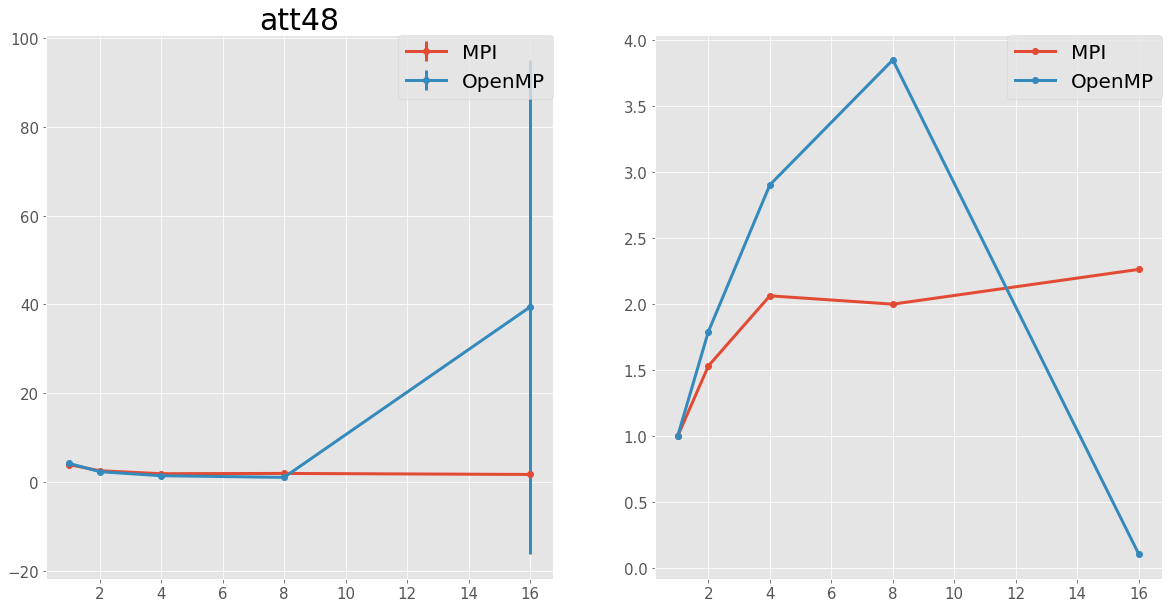

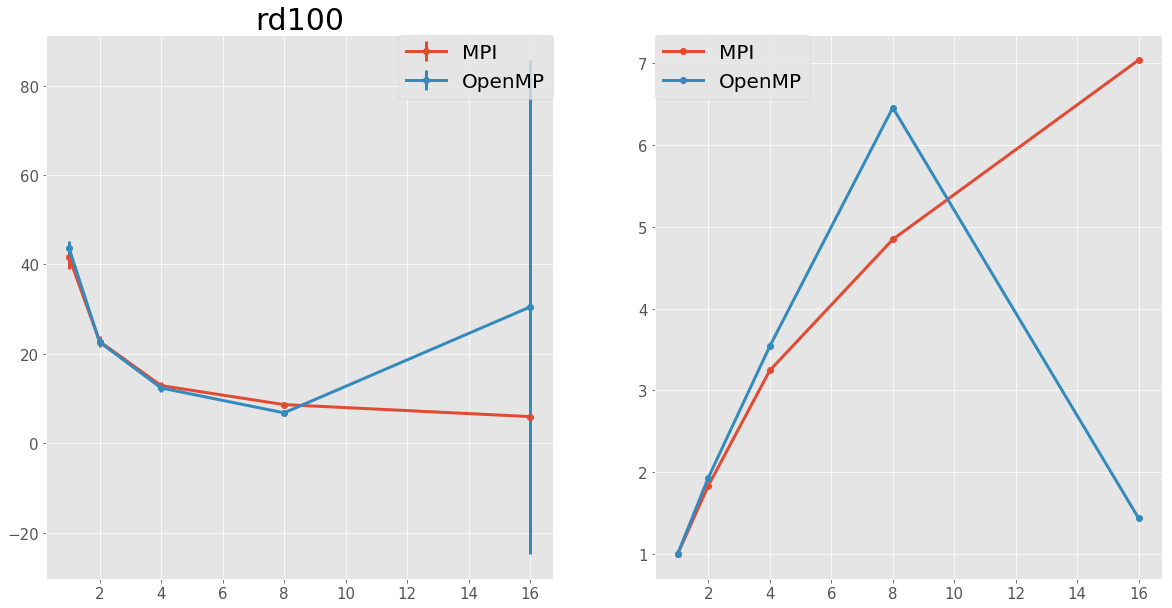

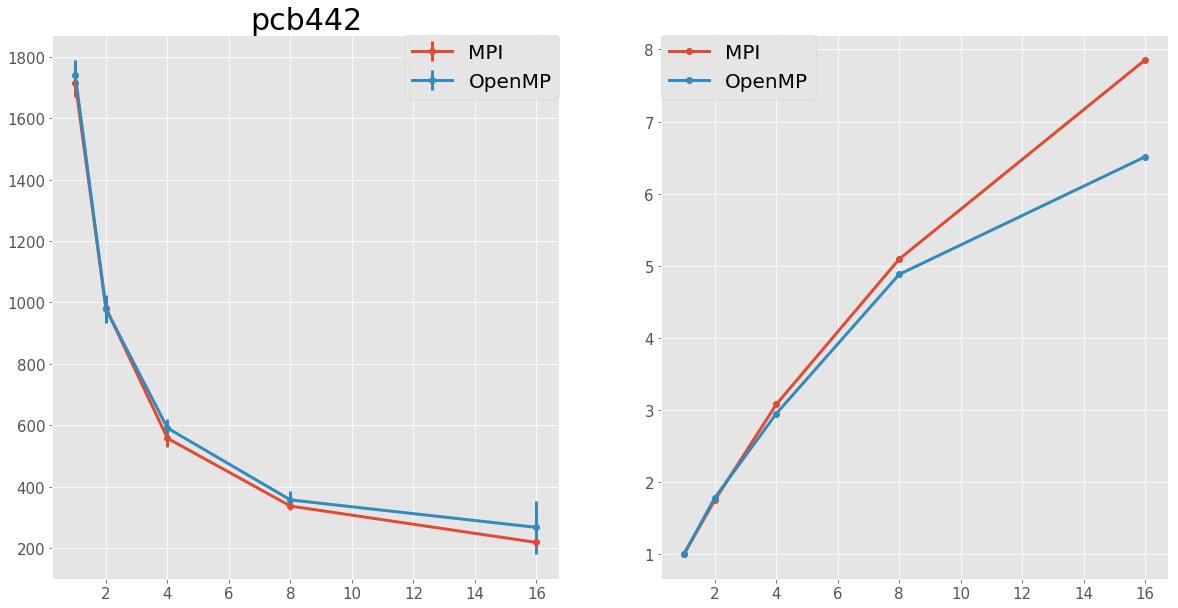

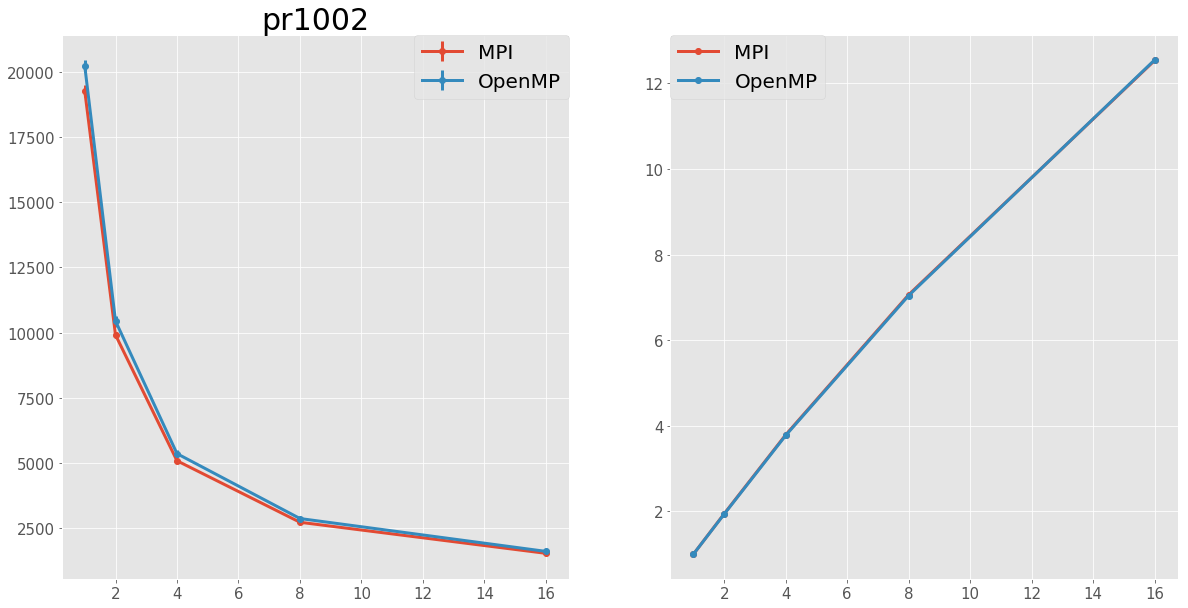

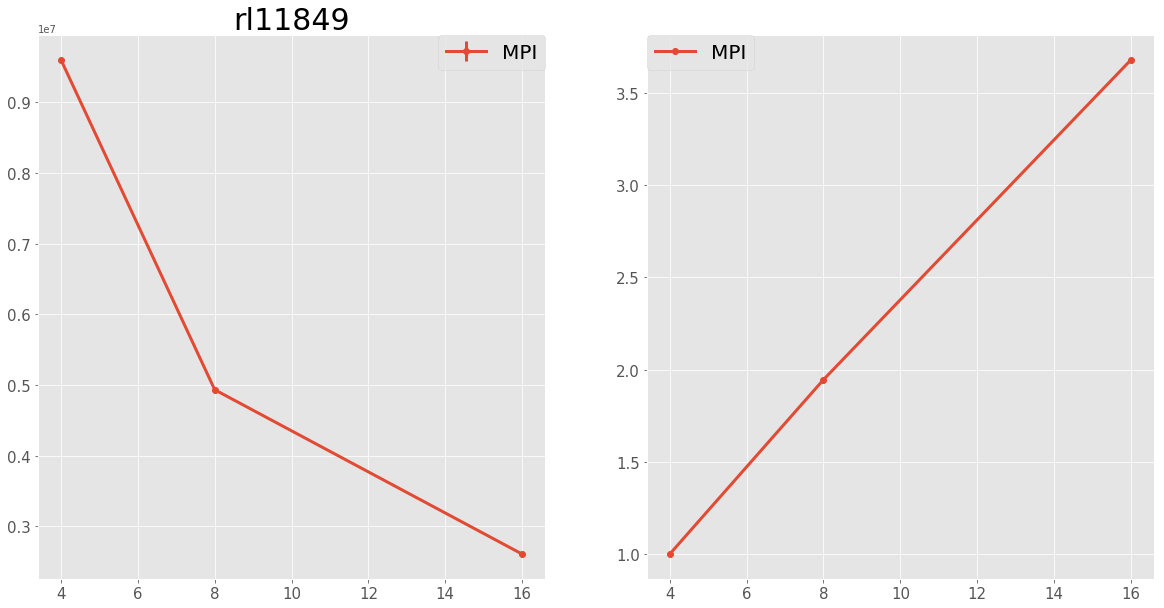

In [11]:
for i, caso in enumerate(casos):
    r = results[caso]
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    set_ax_style(axis[1])
    
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI"]["Tempo Total"])
    tempoMPIstd = np.array(r[r.Tipo=="MPI"]["Tempo Total (std)"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    tempoOpenMP = np.array(r[r.Tipo=="OpenMP"]["Tempo Total"])
    if( len(tempoOpenMP) > 0):
        tempoOpenMPstd = np.array(r[r.Tipo=="OpenMP"]["Tempo Total (std)"])
        speedUpOpenMP = np.power(np.array(tempoOpenMP),-1)*tempoOpenMP[0]
    
    
    axis[0].errorbar(procs, tempoMPI, marker="o",lw=3, label="MPI", yerr=tempoMPIstd)
    axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="MPI")
    if( len(tempoOpenMP) > 0):    
        axis[0].errorbar(procs, tempoOpenMP, yerr=tempoOpenMPstd, marker="o", lw=3, label="OpenMP")
        axis[1].plot(procs, speedUpOpenMP, marker="o", lw=3, label="OpenMP")
    
    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title(caso, fontsize=30)
    
    

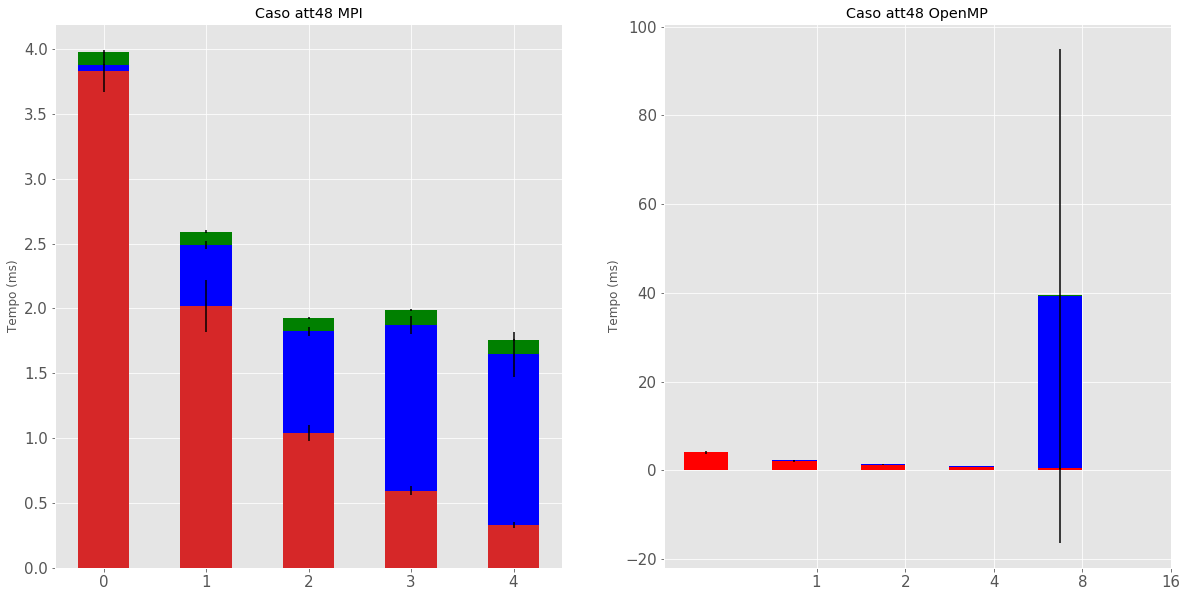

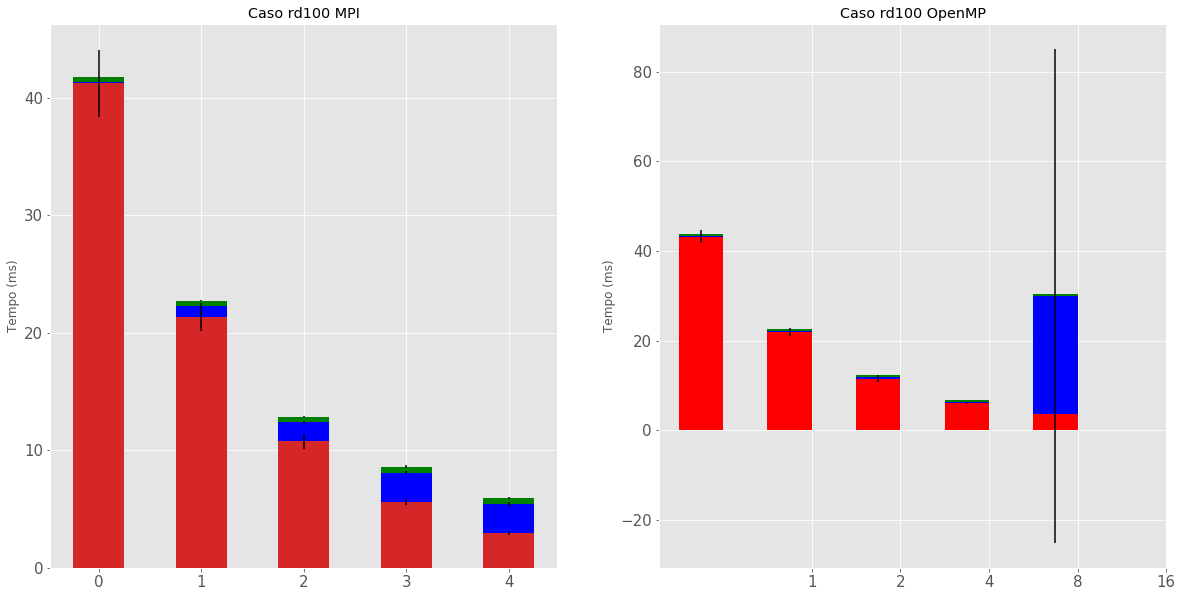

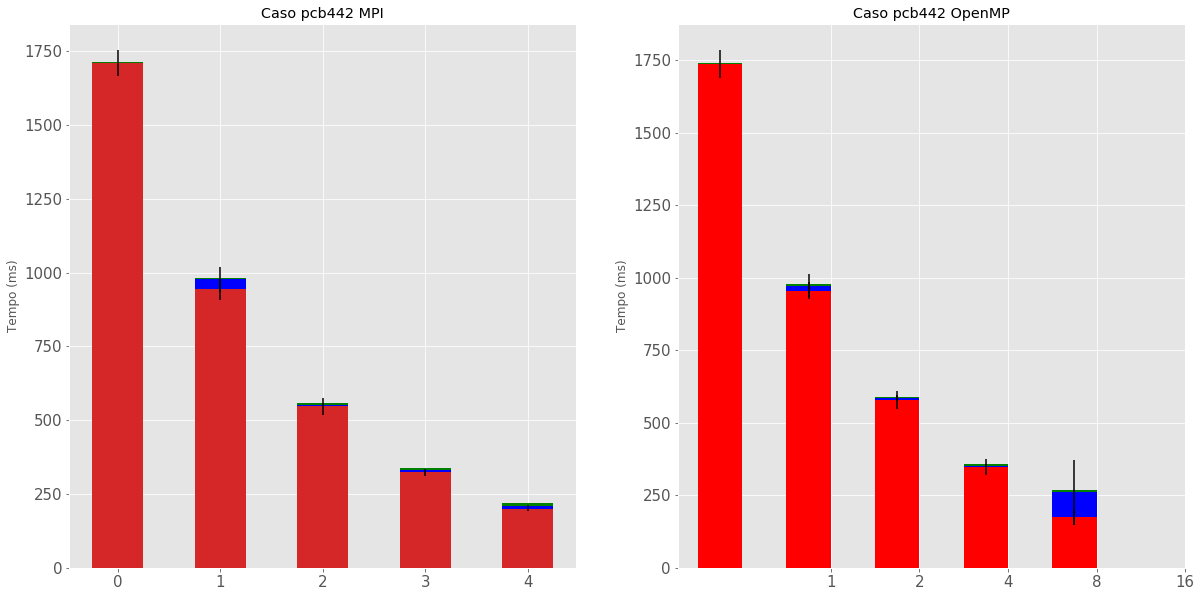

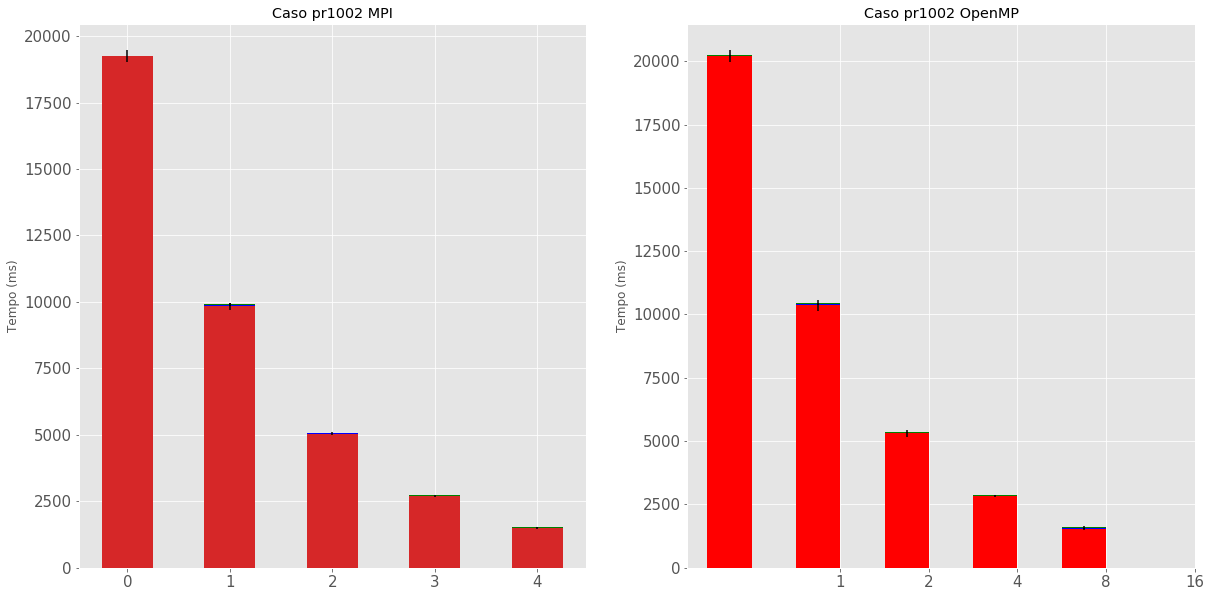

ValueError: incompatible sizes: argument 'height' must be length 3 or scalar

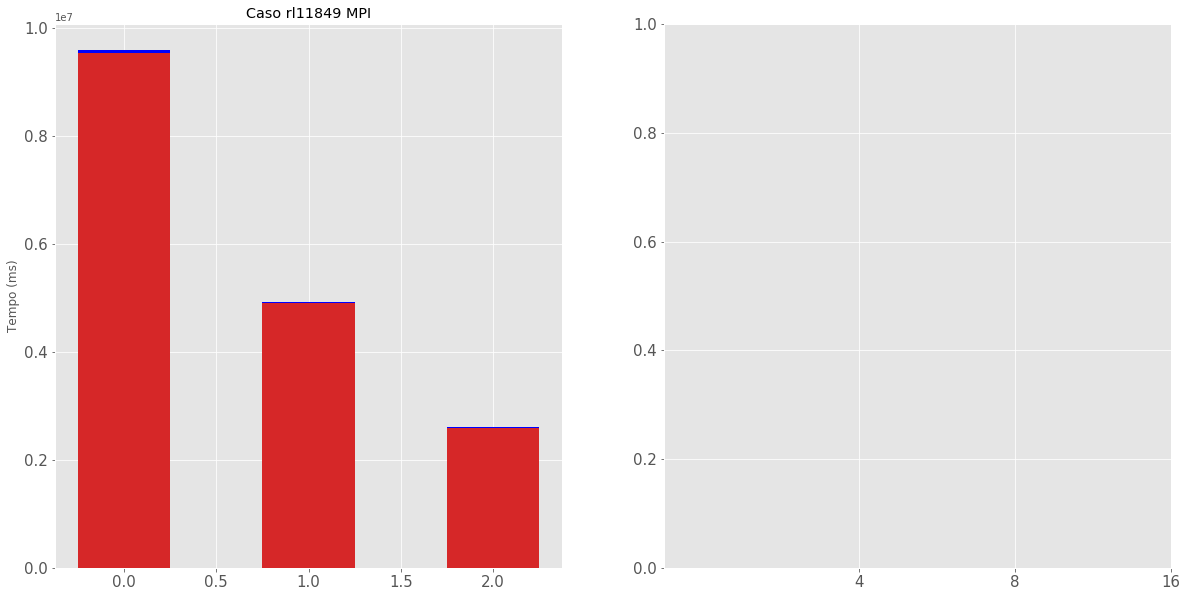

In [12]:
for caso in casos:
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    set_ax_style(axis[1])
    width = 0.5       # the width of the bars: can also be len(x) sequence
    
    r = results[caso]
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    
    # positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(procs))]

    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i+(width/2) for i in bar_l]   
    
    tempoEncMinMPI = np.array(r[r.Tipo=="MPI"]["Tempo Encontrar Minimo"])
    tempoEncMinMPIStd = np.array(r[r.Tipo=="MPI"]["Tempo Encontrar Minimo (std)"])

    tempoSincMPI = np.array(r[r.Tipo=="MPI"]["Tempo Sincronizar"])
    tempoSincMPIStd= np.array(r[r.Tipo=="MPI"]["Tempo Sincronizar (std)"])

    tempoSwapMPI = np.array(r[r.Tipo=="MPI"]["Tempo Swap"])
    tempoSwapMPIStd= np.array(r[r.Tipo=="MPI"]["Tempo Swap (std)"])
    
    ind = np.arange(len(procs))    # the x locations for the groups

    plt.xticks(tick_pos, procs)
    p1 = axis[0].bar(ind, tempoEncMinMPI, width, color='#d62728', yerr=tempoEncMinMPIStd)
    p2 = axis[0].bar(ind, tempoSincMPI, width,
                 bottom=tempoEncMinMPI, yerr=tempoSincMPIStd, color="blue")
    p3 = axis[0].bar(ind, tempoSwapMPI, width,
                 bottom=tempoSincMPI+tempoEncMinMPI, yerr=tempoSwapMPIStd, color="green")

    axis[0].legend(loc='upper left')
    axis[0].set_ylabel('Tempo (ms)')
    axis[0].set_title('Caso %s MPI' % caso)
    
    
    # positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(procs))]

    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i+(width/2) for i in bar_l]   
    
    tempoEncMinMPI = np.array(r[r.Tipo=="OpenMP"]["Tempo Encontrar Minimo"])
    tempoEncMinMPIStd = np.array(r[r.Tipo=="OpenMP"]["Tempo Encontrar Minimo (std)"])

    tempoSincMPI = np.array(r[r.Tipo=="OpenMP"]["Tempo Sincronizar"])
    tempoSincMPIStd= np.array(r[r.Tipo=="OpenMP"]["Tempo Sincronizar (std)"])

    tempoSwapMPI = np.array(r[r.Tipo=="OpenMP"]["Tempo Swap"])
    tempoSwapMPIStd= np.array(r[r.Tipo=="OpenMP"]["Tempo Swap (std)"])
    
    ind = np.arange(len(procs))    # the x locations for the groups


    p1 = axis[1].bar(ind, tempoEncMinMPI, width, color='red', yerr=tempoEncMinMPIStd, label="Tempo Encontrar minimo")
    p2 = axis[1].bar(ind, tempoSincMPI, width,
                 bottom=tempoEncMinMPI, yerr=tempoSincMPIStd, color="blue")
    p3 = axis[1].bar(ind, tempoSwapMPI, width,
                 bottom=tempoSincMPI+tempoEncMinMPI, yerr=tempoSwapMPIStd, color="green")

    
    plt.xticks(tick_pos, procs)
    axis[1].set_ylabel('Tempo (ms)')
    axis[1].set_title('Caso %s OpenMP' % caso)
    
    plt.show()


att48
rd100
pcb442
pr1002


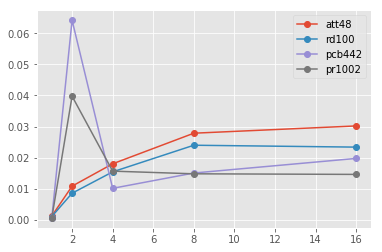

In [23]:
fig, ax = plt.subplots(1,1)
for caso in casos[:-1]:
    print caso
    r = results[caso]
    procs = r[r.Tipo=="MPI"]["Processos/Threads"].unique()
    y = np.array(r[r.Tipo == "MPI"]["Tempo Sincronizar"])/np.array(r[r.Tipo == "MPI"]["Iteracoes"])
    ax.plot(procs, y, label=caso, marker="o")
    ax.legend()

# Resultados Cluster 

In [25]:
names = ["Caso", "Tipo", "Processos/Threads" ,"Tempo Total", "Tempo Encontrar Minimo", "Tempo Sincronizar", "Iteracoes", "Custo Calc", "Custo Otimo"]
data = pd.read_csv("resultados_random_6.txt", sep=";", header=None, names=names)
data["Tempo Swap"] = data["Tempo Total"] - data["Tempo Encontrar Minimo"] - data["Tempo Sincronizar"]
names.append("Tempo Swap")
data.Caso = data.Caso.apply(lambda x: x.split("/")[-1].split(".")[0])
data.Tipo = data.Tipo.apply(lambda x: x.strip())
casos = data.Caso.unique()
mean_data = data.groupby(names[0:3], as_index=False).mean()
mean_data



,Caso,Tipo,Processos/Threads,Tempo Total,Tempo Encontrar Minimo,Tempo Sincronizar,Iteracoes,Custo Calc,Custo Otimo,Tempo Swap
0,rl11849,MPI,16,2.619795e+06,2.600211e+06,16233.017578,18084.50,1.052883e+06,0.0,3351.533142
1,rl11849,MPI,32,1.315649e+06,1.297725e+06,14578.155396,18047.75,1.050598e+06,0.0,3345.700683
2,rl11849,MPI,64,6.606179e+05,6.500260e+05,7259.334106,18033.50,1.053277e+06,0.0,3332.583801
3,rl11849,MPI,96,4.526534e+05,4.353715e+05,13929.554382,18068.75,1.047863e+06,0.0,3352.313049
4,rl5915,MPI,16,3.099757e+05,3.076205e+05,1566.836121,9004.00,6.445471e+05,0.0,788.372803
5,rl5915,MPI,32,1.561934e+05,1.539482e+05,1453.377075,8987.75,6.387415e+05,0.0,791.868225
6,rl5915,MPI,64,8.002761e+04,7.747586e+04,1761.114136,9004.50,6.415269e+05,0.0,790.640014
7,rl5915,MPI,96,5.573552e+04,5.200204e+04,2934.525635,9012.75,6.459752e+05,0.0,798.958190


In [26]:
std_data = data.groupby(names[0:3], as_index=True).std()
for name in names[3:]:
    key = "%s (std)" % name
    mean_data[key.strip()] = np.array(std_data[name])

mean_data

,Caso,Tipo,Processos/Threads,Tempo Total,Tempo Encontrar Minimo,Tempo Sincronizar,Iteracoes,Custo Calc,Custo Otimo,Tempo Swap,Tempo Total (std),Tempo Encontrar Minimo (std),Tempo Sincronizar (std),Iteracoes (std),Custo Calc (std),Custo Otimo (std),Tempo Swap (std)
0,rl11849,MPI,16,2.619795e+06,2.600211e+06,16233.017578,18084.50,1.052883e+06,0.0,3351.533142,7216.693123,14265.248716,11899.148889,39.786933,5207.794821,0.0,14.153614
1,rl11849,MPI,32,1.315649e+06,1.297725e+06,14578.155396,18047.75,1.050598e+06,0.0,3345.700683,9846.390334,3947.408205,6417.951492,52.607826,4076.619400,0.0,13.183620
2,rl11849,MPI,64,6.606179e+05,6.500260e+05,7259.334106,18033.50,1.053277e+06,0.0,3332.583801,2626.285863,2932.661497,342.367741,73.241609,2574.460603,0.0,19.689837
3,rl11849,MPI,96,4.526534e+05,4.353715e+05,13929.554382,18068.75,1.047863e+06,0.0,3352.313049,11720.314935,1121.091198,11844.095575,23.879908,3258.401080,0.0,21.156516
4,rl5915,MPI,16,3.099757e+05,3.076205e+05,1566.836121,9004.00,6.445471e+05,0.0,788.372803,1598.627070,2127.118147,1082.746775,54.203321,7254.822661,0.0,5.747242
5,rl5915,MPI,32,1.561934e+05,1.539482e+05,1453.377075,8987.75,6.387415e+05,0.0,791.868225,1006.727410,937.817458,467.164844,54.524459,2575.642948,0.0,6.277486
6,rl5915,MPI,64,8.002761e+04,7.747586e+04,1761.114136,9004.50,6.415269e+05,0.0,790.640014,323.634719,541.482611,313.221553,33.451457,6667.069193,0.0,2.362730
7,rl5915,MPI,96,5.573552e+04,5.200204e+04,2934.525635,9012.75,6.459752e+05,0.0,798.958190,1011.794309,192.786148,1196.058054,23.683679,4758.372675,0.0,2.351309


In [27]:
results={}

for caso in mean_data["Caso"].unique():
    results[caso] = pd.DataFrame(mean_data[mean_data.Caso == caso])

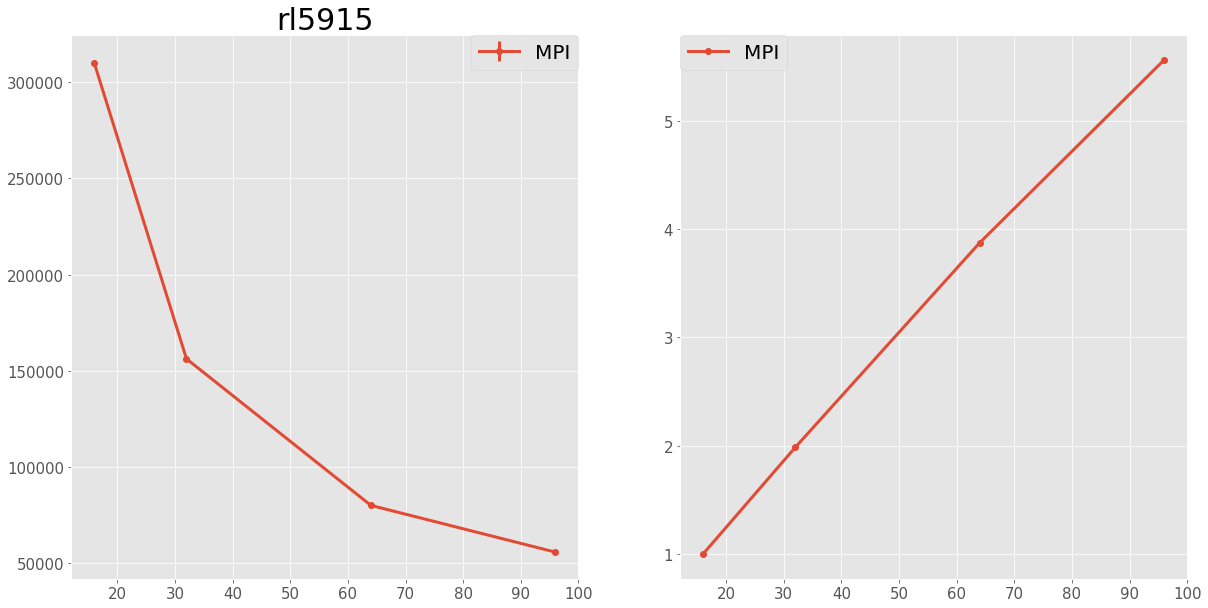

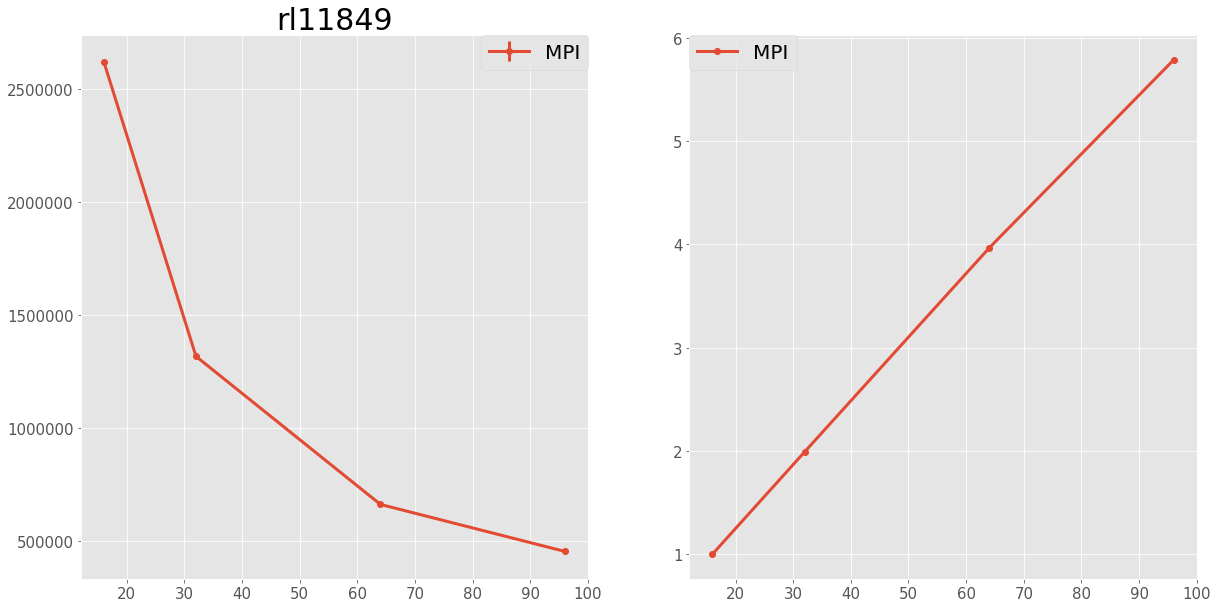

In [28]:
for i, caso in enumerate(casos):
    r = results[caso]
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    set_ax_style(axis[1])
    
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    tempoMPI = np.array(r[r.Tipo=="MPI"]["Tempo Total"])
    tempoMPIstd = np.array(r[r.Tipo=="MPI"]["Tempo Total (std)"])
    speedUpMPI = np.power(np.array(tempoMPI),-1)*tempoMPI[0]
    tempoOpenMP = np.array(r[r.Tipo=="OpenMP"]["Tempo Total"])
    if( len(tempoOpenMP) > 0):
        tempoOpenMPstd = np.array(r[r.Tipo=="OpenMP"]["Tempo Total (std)"])
        speedUpOpenMP = np.power(np.array(tempoOpenMP),-1)*tempoOpenMP[0]
    
    
    axis[0].errorbar(procs, tempoMPI, marker="o",lw=3, label="MPI", yerr=tempoMPIstd)
    axis[1].plot(procs, speedUpMPI, marker="o",lw=3, label="MPI")
    if( len(tempoOpenMP) > 0):    
        axis[0].errorbar(procs, tempoOpenMP, yerr=tempoOpenMPstd, marker="o", lw=3, label="OpenMP")
        axis[1].plot(procs, speedUpOpenMP, marker="o", lw=3, label="OpenMP")
    
    axis[0].legend(borderaxespad=0., fontsize=20)
    axis[1].legend(borderaxespad=0., fontsize=20)
    axis[0].set_title(caso, fontsize=30)
    
    

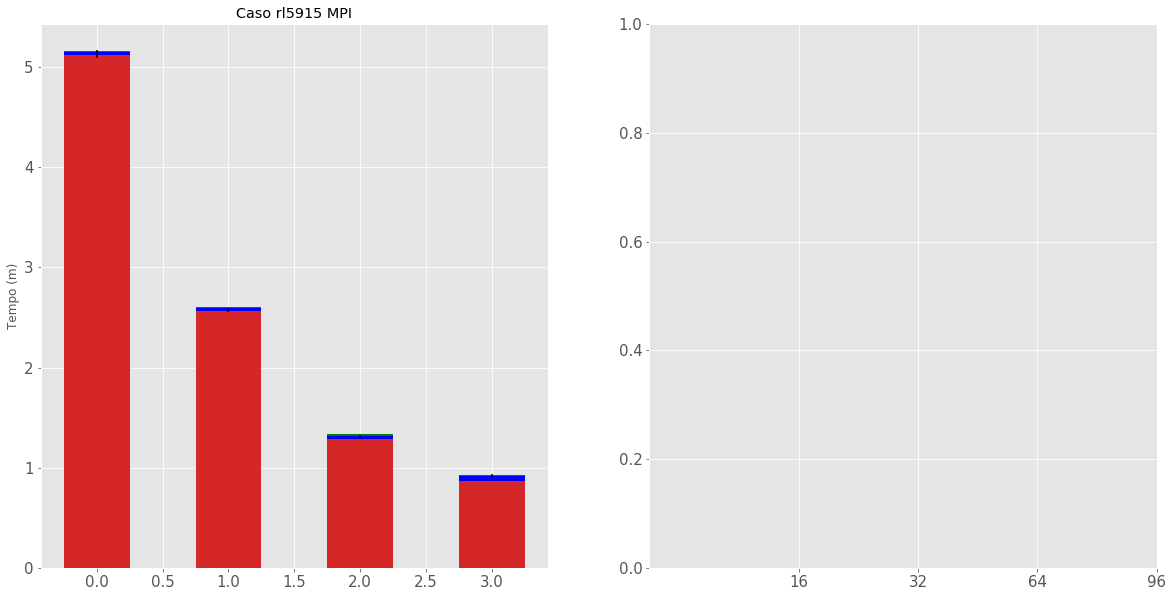

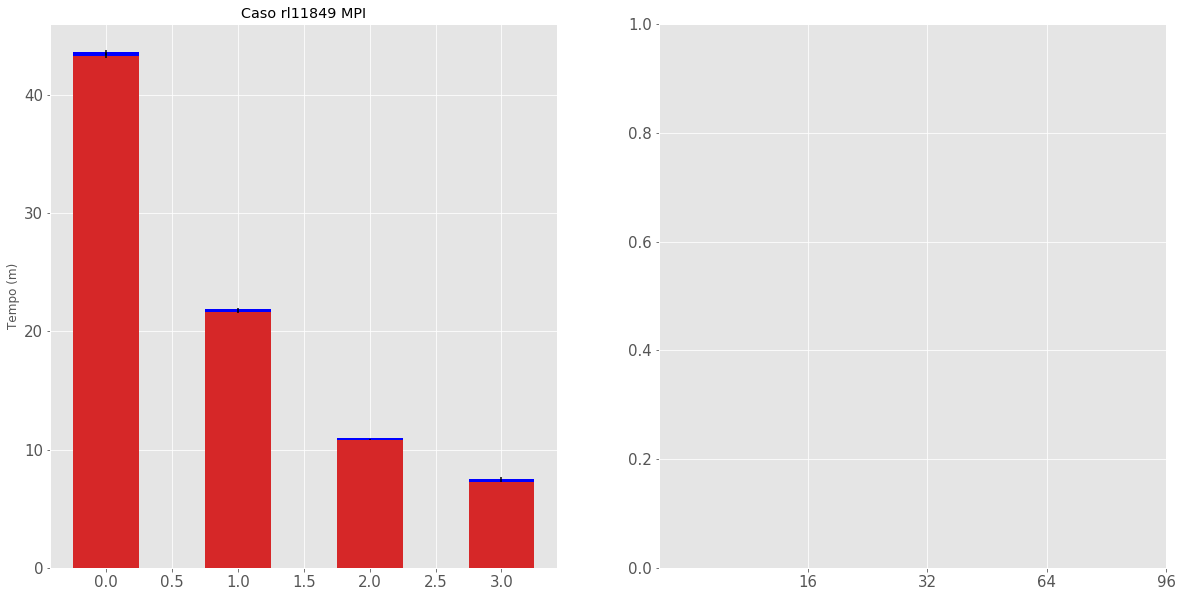

In [29]:
for caso in casos:
    fig, axis = plt.subplots(1,2, figsize=(20,10))
    set_ax_style(axis[0])
    set_ax_style(axis[1])
    width = 0.5       # the width of the bars: can also be len(x) sequence
    
    r = results[caso]
    procs = r[r.Tipo=="MPI"]["Processos/Threads"]
    
    # positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(procs))]

    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i+(width/2) for i in bar_l]   
    
    ms2min = 1/1000.0/60.0
    
    tempoEncMinMPI = np.array(r[r.Tipo=="MPI"]["Tempo Encontrar Minimo"])*ms2min 
    tempoEncMinMPIStd = np.array(r[r.Tipo=="MPI"]["Tempo Encontrar Minimo (std)"])*ms2min 

    tempoSincMPI = np.array(r[r.Tipo=="MPI"]["Tempo Sincronizar"])*ms2min 
    tempoSincMPIStd= np.array(r[r.Tipo=="MPI"]["Tempo Sincronizar (std)"])*ms2min 

    tempoSwapMPI = np.array(r[r.Tipo=="MPI"]["Tempo Swap"])*ms2min 
    tempoSwapMPIStd= np.array(r[r.Tipo=="MPI"]["Tempo Swap (std)"])*ms2min 
    
    ind = np.arange(len(procs))    # the x locations for the groups

    plt.xticks(tick_pos, procs)
    p1 = axis[0].bar(ind, tempoEncMinMPI, width, color='#d62728', yerr=tempoEncMinMPIStd)
    p2 = axis[0].bar(ind, tempoSincMPI, width,
                 bottom=tempoEncMinMPI, yerr=tempoSincMPIStd, color="blue")
    p3 = axis[0].bar(ind, tempoSwapMPI, width,
                 bottom=tempoSincMPI+tempoEncMinMPI, yerr=tempoSwapMPIStd, color="green")

    axis[0].legend(loc='upper left')
    axis[0].set_ylabel('Tempo (m)')
    axis[0].set_title('Caso %s MPI' % caso)
    
    
    plt.show()

